In [1]:
from google.colab import drive
import os

#drive.mount("/content/drive")

#%cd /content/drive/MyDrive/EPITA/SCIA/ing3/DNN/

In [2]:
!pip install transformers

In [3]:
from PIL import Image
import requests
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

import csv
import os

device = device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
model_name = "Salesforce/blip-image-captioning-large"

processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [5]:
img_url = "https://content.libraries.wsu.edu/iiif/2/propaganda:402/full/730,/0/default.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

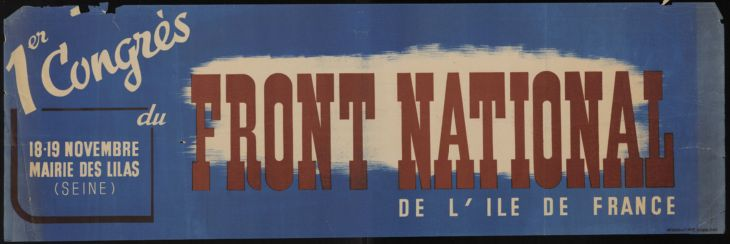

In [6]:
raw_image

In [7]:
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to(device)
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a sign advertising a front national restaurant


In [8]:
inputs = processor(raw_image, return_tensors="pt").to(device)
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a close up of a sign advertising a front national restaurant


In [9]:
dossier_images = '/content'

# Liste des noms de fichiers dans le dossier
noms_fichiers = os.listdir(dossier_images)
#noms_fichiers

In [7]:
# Créer un fichier CSV pour stocker les résultats
number = 0
csv_file_path = '/content/img2text_movie_propaganda.csv'
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Écrire l'en-tête du CSV
    csv_writer.writerow(['title', 'classes', 'generated_text_1', 'generated_text_2'])

    # Charger chaque image individuellement
    for nom_fichier in noms_fichiers:
        if nom_fichier.endswith('.jpg') and number < 525:
            chemin_complet = os.path.join(dossier_images, nom_fichier)

            raw_image = Image.open(chemin_complet).convert('RGB')

            text = "a photography of"
            inputs = processor(raw_image, text, return_tensors="pt").to(device)
            out = model.generate(**inputs)
            generated_text = processor.decode(out[0], skip_special_tokens=True)

            inputs = processor(raw_image, return_tensors="pt").to(device)
            out = model.generate(**inputs)
            generated_text2 = processor.decode(out[0], skip_special_tokens=True)
            # Écrire le nom du fichier et le texte généré dans le CSV
            csv_writer.writerow([nom_fichier, 'none_propaganda', generated_text, generated_text2])
        if number > 525:
            break
        number += 1

print(f"Les résultats ont été enregistrés dans {csv_file_path} and the number is {number}")

Les résultats ont été enregistrés dans /content/img2text_movie_propaganda.csv and the number is 526
